# Trung Nguyen - 111752939
## Assignment #2: Exploratory Data Analysis in IPython

# Task 1

In [1]:
# df.columns
# df.dtypes
# df['bedroomcnt'].tolist()
# df.set_index('bathroomcnt')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

# df = pd.read_csv('./data/properties_2016.csv', nrows=10000)
df = pd.read_csv('./data/properties_2016.csv', low_memory=False)
# Calculate mean value and replace NaN values with mean value

In [2]:
bath_median = df['bathroomcnt'].median(skipna=True)
df['bathroomcnt'].fillna(value=bath_median, inplace=True)

bath_mean = df['bedroomcnt'].mean(skipna=True)
df['bedroomcnt'].fillna(value=bath_mean, inplace=True)


In [3]:
df_filled = df.fillna(0)

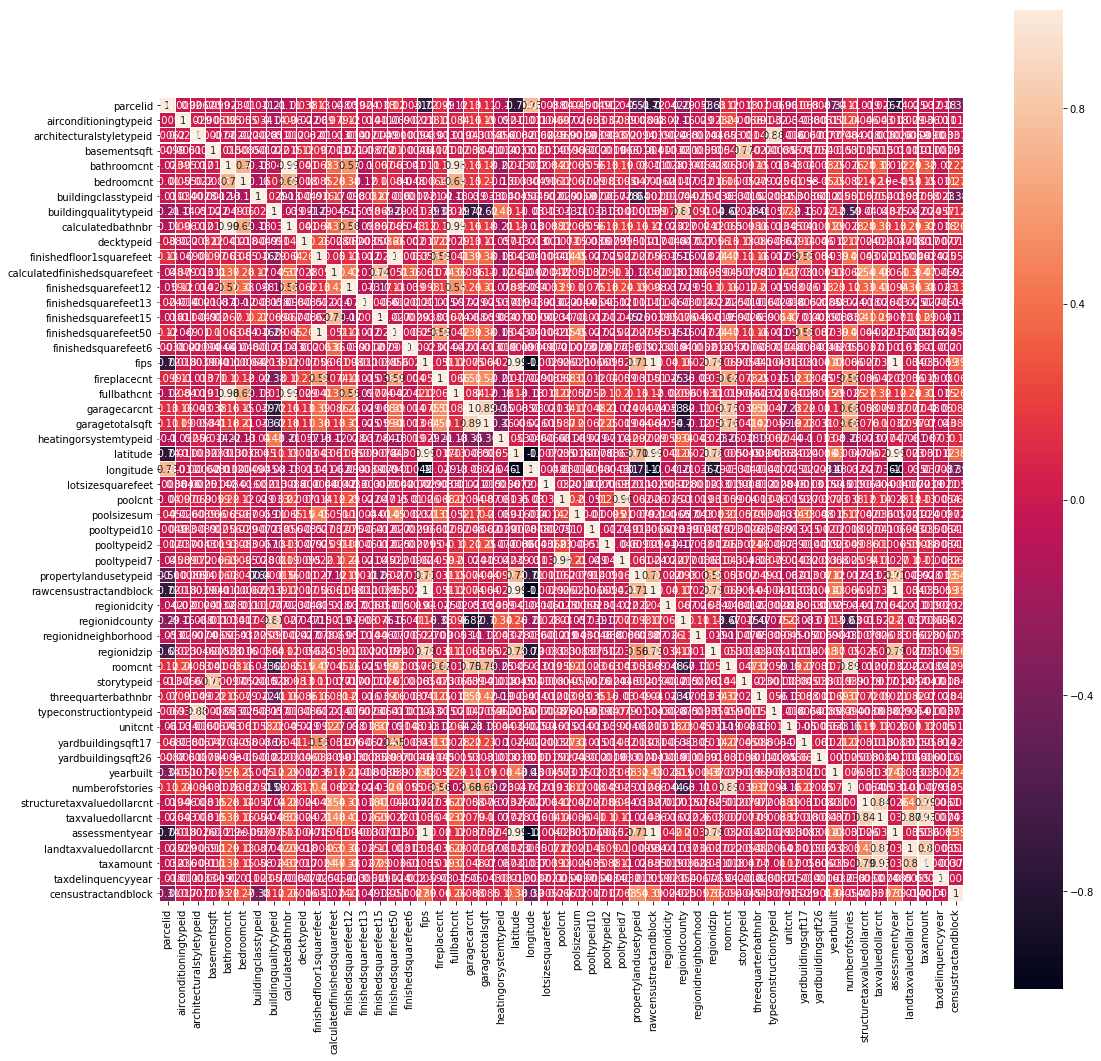

In [4]:
corr = df_filled.corr(method='pearson', min_periods=1)
fig1, ax1 = plt.subplots(figsize=(18,18))  
sns.heatmap(corr, square=True, ax=ax1, linewidths=0.1, annot=True)
plt.show()

# Task 3

In [5]:
y = pd.read_csv('./data/train_2016_v2.csv')
y_dropped = y.drop_duplicates('parcelid')

In [8]:
df_dropped = df_filled.drop(["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", 
                        "fireplaceflag", "taxdelinquencyflag", "assessmentyear"], axis=1)
X = df_dropped[df_dropped['parcelid'].isin(y_dropped.loc[:,'parcelid'])]
X_learn = X.copy()


In [23]:
# Use all features 
X_learn1 = np.reshape(X_learn, (-1, 52))
y_learn = y_dropped['logerror']
y_learn = np.reshape(y_learn, (-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_learn1, y_learn1, test_size=0.2, random_state=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: %.9f" % regr.coef_[0])
# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.9f' % r2_score(y_test, y_pred))

Coefficients: -0.000000000
Mean squared error: 0.032068872
Variance score: -0.001245657


In [33]:
F, pval = f_regression(X_learn, y_learn.ravel(), center=True)
print('The most significant feature (smallest p-value): %s' %X.columns.values[pval.argmin()])


The most significant feature (smallest p-value): longitude


Coefficients: 0.000000002
Mean squared error: 0.027705462
Variance score: 0.000095063


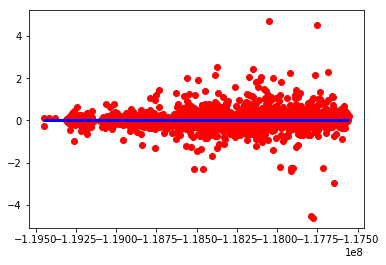

In [24]:
# Use only one feature
X_learn2 = X_learn['longitude']
X_learn2 = np.reshape(X_learn2, (-1, 1))
y_learn = y_dropped['logerror']
y_learn = np.reshape(y_learn, (-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_learn2, y_learn, test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: %.9f" % regr.coef_[0][0])
# The mean squared error
print("Mean squared error: %.9f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.9f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=2)

plt.show()

# Task 5


In [20]:
# X_predict = np.reshape(df_dropped, (-1, 52))
X_predict = np.reshape(df_dropped['longitude'], (-1, 1))

y_pred = regr.predict(X_predict)
df1 = pd.read_csv('./data/sample_submission.csv', low_memory=False)
df2 = df1.copy()

In [21]:
y_pred = np.ndarray.flatten(y_pred)
df3 = pd.DataFrame({'Log error prediction': y_pred})
df2['201610'] = df3['Log error prediction']
df2['201611'] = df3['Log error prediction']
df2['201612'] = df3['Log error prediction']
df2['201710'] = df3['Log error prediction']
df2['201711'] = df3['Log error prediction']
df2['201712'] = df3['Log error prediction']
df2.to_csv('./data/out.csv',index=False)